# Partie 1: Exploration et Préparation des Données

# 1.1 Importation et Analyse Initiale

In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering  #clustering hiearchique
from scipy.cluster.hierarchy import dendrogram, linkage 

In [2]:
# Charger le dataset 
df = pd.read_csv("train.csv")
df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


In [3]:
# examiner la structure :
print("le nombre de lignes et des colonnes : ")
df.shape

le nombre de lignes et des colonnes : 


(209673, 8)

In [4]:
#Identifier les variables clés
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


1-trip_duration : Durée du trajet
Temps total de la course (probablement en secondes)

2-distance_traveled : Distance parcourue
Distance totale du trajet (probablement en kilomètres)

3-num_of_passengers : Nombre de passagers
Combien de personnes ont pris le taxi pour cette course

4-fare : Tarif de base
Le prix de base de la course (sans pourboire ni frais supplémentaires)

5-tip : Pourboire
Le montant du pourboire laissé par le client

6-miscellaneous_fees : Frais divers
Frais supplémentaires (péages, frais d'aéroport, etc.)

7-total_fare : Tarif total
Le montant total payé = fare + tip + miscellaneous_fees

8-surge_applied : Tarification dynamique appliquée
Indique si un supplément pour forte demande a été appliqué (1 = oui, 0 = non)
Aussi appelé "prix de pointe" ou "surge pricing"

In [5]:
df.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [6]:
# Analyser les types de variables (numériques, catégorielles, temporelles)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [7]:
# Convertir num_of_passengers en entier
df['num_of_passengers'] = df['num_of_passengers'].astype(int)

In [8]:
df["surge_applied"].unique()

array([0, 1], dtype=int64)

In [9]:
# Vérifier les valeurs manquantes
df.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

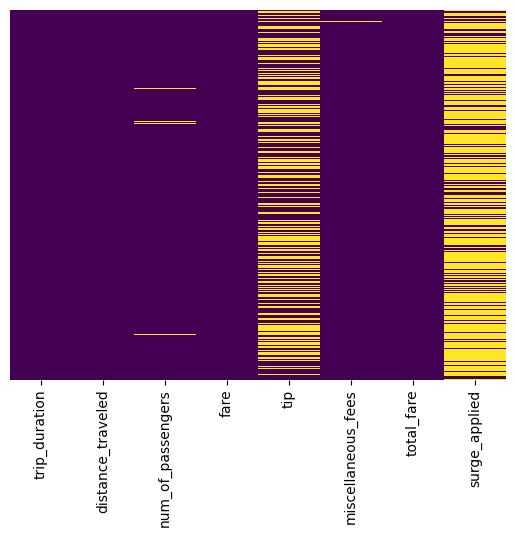

In [12]:
sns.heatmap(df==0,yticklabels=False,cbar=False,cmap='viridis')
plt.show()

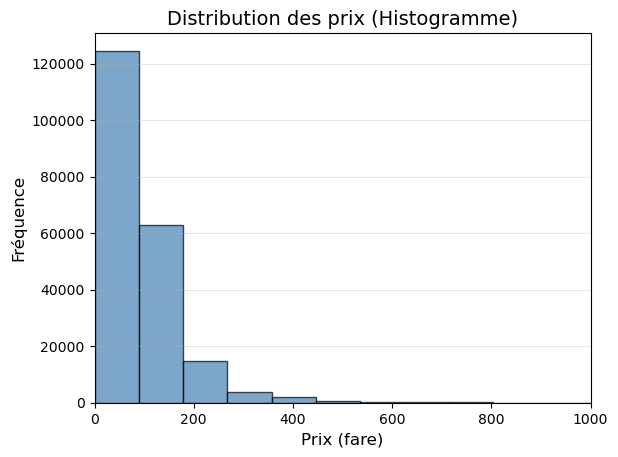

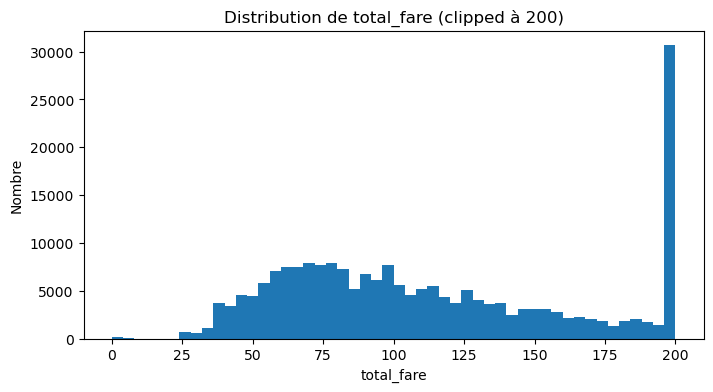

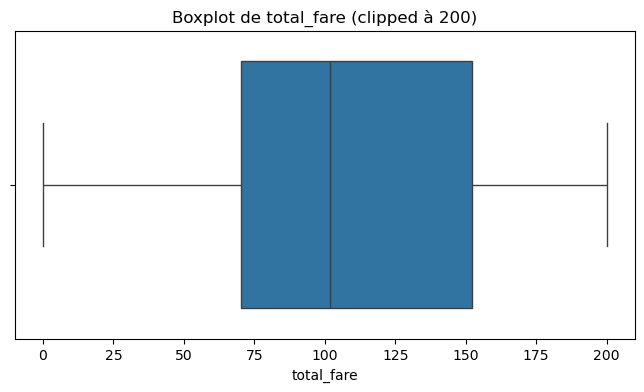

Statistiques descriptives des prix:
count    209673.000000
mean         99.623431
std          85.602702
min           0.000000
25%          52.500000
50%          75.000000
75%         116.250000
max        4466.250000
Name: fare, dtype: float64

Étendue: 4466.25
Variance: 7327.82


In [13]:
# Étudier la distribution des prix (histogramme, boxplot)

# Histogramme
plt.hist(df['fare'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.title('Distribution des prix (Histogramme)', fontsize=14)
plt.xlabel('Prix (fare)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.xlim(0, 1000)  # Limiter l'axe des x de 0 à 1000
plt.grid(axis='y', alpha=0.3)


plt.figure(figsize=(8,4))
plt.hist(df['total_fare'].clip(0,200), bins=50)
plt.title('Distribution de total_fare (clipped à 200)')
plt.xlabel('total_fare'); plt.ylabel('Nombre')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['total_fare'].clip(0,200))
plt.title('Boxplot de total_fare (clipped à 200)')
plt.show()

# Statistiques descriptives
print("Statistiques descriptives des prix:")
print(df['fare'].describe())
print(f"\nÉtendue: {df['fare'].max() - df['fare'].min():.2f}")
print(f"Variance: {df['fare'].var():.2f}")

In [14]:
# Convertir trip_duration de secondes en minutes
df['trip_duration'] = (df['trip_duration'] / 60).round(2)

In [15]:
print("min: ",df['trip_duration'].min(),"min \n")
print("max: ",df['trip_duration'].max(),"min \n")
print("moyenne: ",df['trip_duration'].mean().round(2),"min ")

min:  0.0 min 

max:  1439.78 min 

moyenne:  19.55 min 


In [16]:
# Analyser et supprimer les outliers de trip_duration
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure pour qu'elle ne soit pas négative
lower_bound = max(lower_bound, 2)  # Minimum de 2 minutes

print(f"Q1: {Q1:.2f} minutes")
print(f"Q3: {Q3:.2f} minutes")
print(f"IQR: {IQR:.2f} minutes")
print(f"Limite supérieure: {upper_bound:.2f} minutes")
print(f"Limite inférieure: {lower_bound:.2f} minutes")

# Nombre d'outliers
outliers = df[(df['trip_duration'] < lower_bound) | (df['trip_duration'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['trip_duration'] >= lower_bound) & (df['trip_duration'] <= upper_bound)]
print(f"Après: {len(df)} lignes")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['trip_duration'].min():.2f} min")
print(f"Max: {df['trip_duration'].max():.2f} min")
print(f"Mean: {df['trip_duration'].mean():.2f} min")
print(f"Median: {df['trip_duration'].median():.2f} min")

Q1: 7.43 minutes
Q3: 18.30 minutes
IQR: 10.87 minutes
Limite supérieure: 34.61 minutes
Limite inférieure: 2.00 minutes

Outliers détectés: 16334 (7.79%)
Avant: 209673 lignes
Après: 193339 lignes

Nouvelles stats:
Min: 2.00 min
Max: 34.60 min
Mean: 12.93 min
Median: 11.45 min


In [17]:
print("min: ",df['distance_traveled'].min(),"km\n")
print("max: ",df['distance_traveled'].max(),"km !!!\n")
print("moyenne: ",df['distance_traveled'].mean(),"km")

min:  0.02 km

max:  57283.91 km !!!

moyenne:  4.51531036159285 km


In [18]:
# Analyser et supprimer les outliers de distance_traveled
Q1 = df['distance_traveled'].quantile(0.25)
Q3 = df['distance_traveled'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure pour qu'elle ne soit pas négative
lower_bound = max(lower_bound, 0.1)  # Minimum 0.1 km (100 mètres)

print(f"Q1: {Q1} km")
print(f"Q3: {Q3} km")
print(f"Limite supérieure: {upper_bound} km")
print(f"Limite inférieure: {lower_bound} km")

# Nombre d'outliers
outliers = df[(df['distance_traveled'] < lower_bound) | (df['distance_traveled'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['distance_traveled'] >= lower_bound) & (df['distance_traveled'] <= upper_bound)]
print(f"Après: {len(df)} lignes")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['distance_traveled'].min()} km")
print(f"Max: {df['distance_traveled'].max()} km")
print(f"Mean: {df['distance_traveled'].mean():.2f} km")

Q1: 1.95 km
Q3: 5.2 km
Limite supérieure: 10.075 km
Limite inférieure: 0.1 km

Outliers détectés: 14277 (7.38%)
Avant: 193339 lignes
Après: 179062 lignes

Nouvelles stats:
Min: 0.1 km
Max: 10.07 km
Mean: 3.47 km


In [21]:
# frais divers
df["miscellaneous_fees"][df['miscellaneous_fees']<0]

22479    -0.250
23194    -0.250
27452    -0.500
30167    -0.500
66388    -0.500
78548    -0.500
83042    -0.375
88830    -0.250
98606    -0.500
100716   -0.500
125277   -0.500
155539   -0.250
168516   -0.500
175321   -0.500
175546   -0.500
178085   -0.500
190615   -0.500
207354   -0.250
Name: miscellaneous_fees, dtype: float64

In [22]:
print("min: ",df['miscellaneous_fees'].min(),"$")
print("max: ",df['miscellaneous_fees'].max(),"$")
print("moyenne: ",df['miscellaneous_fees'].mean(),"$")

min:  -0.5 $
max:  159.75 $
moyenne:  13.960203728317566 $


In [23]:
# Analyser et supprimer les outliers de miscellaneous_fees
Q1 = df['miscellaneous_fees'].quantile(0.25)
Q3 = df['miscellaneous_fees'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure (minimum 0)
lower_bound = max(lower_bound, 0.0)  # Minimum 0.00 $ (pas de frais négatifs)

print(f"Q1: {Q1} $")
print(f"Q3: {Q3} $")
print(f"IQR: {IQR} $")
print(f"Limite supérieure: {upper_bound} $")
print(f"Limite inférieure: {lower_bound} $")

# Nombre d'outliers
outliers = df[(df['miscellaneous_fees'] < lower_bound) | (df['miscellaneous_fees'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['miscellaneous_fees'] >= lower_bound) & (df['miscellaneous_fees'] <= upper_bound)]
print(f"Après: {len(df)} lignes")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['miscellaneous_fees'].min()} $")
print(f"Max: {df['miscellaneous_fees'].max()} $")
print(f"Mean: {df['miscellaneous_fees'].mean():.2f} $")
print(f"Median: {df['miscellaneous_fees'].median():.2f} $")

Q1: 6.0 $
Q3: 26.200000000000003 $
IQR: 20.200000000000003 $
Limite supérieure: 56.50000000000001 $
Limite inférieure: 0.0 $

Outliers détectés: 387 (0.22%)
Avant: 179062 lignes
Après: 178675 lignes

Nouvelles stats:
Min: 0.0 $
Max: 55.875 $
Mean: 13.85 $
Median: 9.75 $


In [24]:
print("min: ",df['tip'].min(),"$")
print("max: ",df['tip'].max(),"$")
print("moyenne: ",df['tip'].mean(),"$")

min:  0 $
max:  2500 $
moyenne:  11.11476703511963 $


In [25]:
# Analyser et supprimer les outliers de tip
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure (minimum 0, les pourboires peuvent être 0)
lower_bound = max(lower_bound, 0.0)  # Minimum 0.00 $ (pas de pourboire négatif)

print(f"Q1: {Q1} $")
print(f"Q3: {Q3} $")
print(f"IQR: {IQR} $")
print(f"Limite supérieure: {upper_bound} $")
print(f"Limite inférieure: {lower_bound} $")

# Nombre d'outliers
outliers = df[(df['tip'] < lower_bound) | (df['tip'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['tip'] >= lower_bound) & (df['tip'] <= upper_bound)]
print(f"Après: {len(df)} lignes")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['tip'].min()} $")
print(f"Max: {df['tip'].max()} $")
print(f"Mean: {df['tip'].mean():.2f} $")
print(f"Median: {df['tip'].median():.2f} $")

Q1: 0.0 $
Q3: 19.0 $
IQR: 19.0 $
Limite supérieure: 47.5 $
Limite inférieure: 0.0 $

Outliers détectés: 1473 (0.82%)
Avant: 178675 lignes
Après: 177202 lignes

Nouvelles stats:
Min: 0 $
Max: 47 $
Mean: 10.57 $
Median: 9.00 $


In [26]:
# supprimer les courses avec 0 passager ou plus que 3
df.drop(df[(df['num_of_passengers'] == 0) | (df['num_of_passengers'] > 4)].index, inplace=True)

In [27]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,12.47,2.75,1,75.00,24,6.300,105.300,0
1,19.78,3.43,1,105.00,24,13.200,142.200,0
2,12.17,3.12,1,71.25,0,26.625,97.875,1
3,11.18,5.63,3,90.00,0,9.750,99.750,0
4,5.48,2.09,1,45.00,12,13.200,70.200,0


In [29]:
# Vérifier la cohérence de total_fare
df['calculated_total'] = df['fare'] + df["tip"] + df['miscellaneous_fees']

# Comparer avec total_fare (avec une tolérance pour les erreurs d'arrondi)
df['difference'] = abs(df['total_fare'] - df['calculated_total'])

# Afficher les statistiques
print("Vérification de la cohérence de total_fare:")
print(f"Nombre de lignes avec différence != 0: {len(df[df['difference'] != 0])}")


# Afficher les lignes incohérentes
incoherent = df[df['difference'] != 0]
if len(incoherent) > 0:
    print(f"\n{len(incoherent)} lignes incohérentes trouvées:")
    print(incoherent[['fare', 'tip', 'miscellaneous_fees', 'total_fare', 'calculated_total', 'difference']].head(10))
else:
    print("\n✅ Toutes les lignes sont cohérentes!")

# Nettoyer les colonnes temporaires
df.drop(['calculated_total', 'difference'], axis=1, inplace=True)

Vérification de la cohérence de total_fare:
Nombre de lignes avec différence != 0: 0

✅ Toutes les lignes sont cohérentes!


1.2 Nettoyage et Feature Engineering

In [31]:

# Analyser et supprimer les outliers de fare
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Ajuster la limite inférieure (minimum NYC)
lower_bound = max(lower_bound, 3.0)  # Minimum 3.00 $ (NYC)

print(f"Q1: {Q1} $")
print(f"Q3: {Q3} $")
print(f"IQR: {IQR} $")
print(f"Limite supérieure: {upper_bound} $")
print(f"Limite inférieure: {lower_bound} $")

# Nombre d'outliers
outliers = df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]
print(f"\nOutliers détectés: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Supprimer les outliers
print(f"Avant: {len(df)} lignes")
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]
print(f"Après: {len(df)} lignes")
print(f"Nombre de courses avec fare > 211.875$: {len(df[df['fare'] > 211.875])}")
print(f"Nombre de courses avec fare < 0$: {len(df[df['fare'] <= 0])}")

# Vérifier les nouvelles statistiques
print(f"\nNouvelles stats:")
print(f"Min: {df['fare'].min()} $")
print(f"Max: {df['fare'].max()} $")
print(f"Mean: {df['fare'].mean():.2f} $")
print(f"Median: {df['fare'].median():.2f} $")



Q1: 52.5 $
Q3: 97.5 $
IQR: 45.0 $
Limite supérieure: 165.0 $
Limite inférieure: 3.0 $

Outliers détectés: 0 (0.00%)
Avant: 167317 lignes
Après: 167317 lignes
Nombre de courses avec fare > 211.875$: 0
Nombre de courses avec fare < 0$: 0

Nouvelles stats:
Min: 15.0 $
Max: 165.0 $
Mean: 76.38 $
Median: 71.25 $


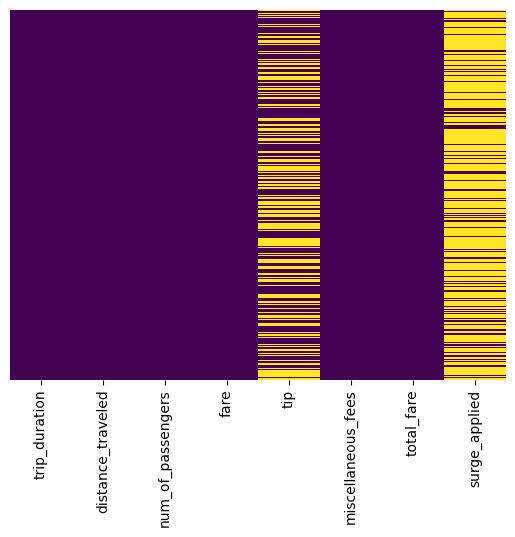

In [32]:
# dataset clean
sns.heatmap(df==0,yticklabels=False,cbar=False,cmap='viridis')
plt.show()

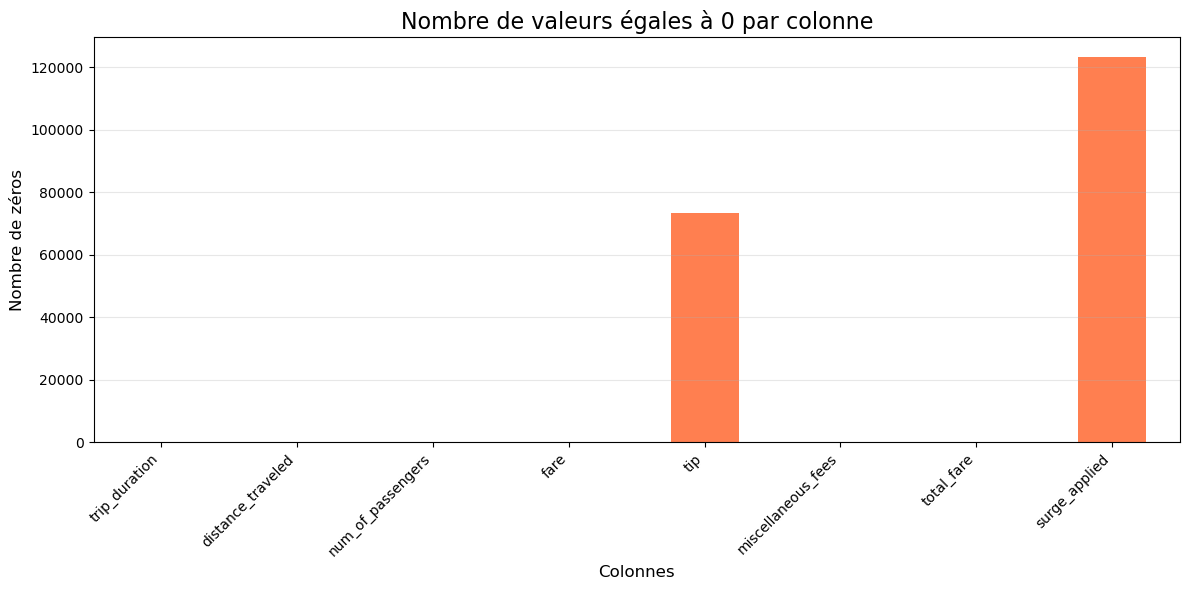


Pourcentage de zéros par colonne:
surge_applied         73.79
tip                   43.82
miscellaneous_fees     0.02
trip_duration          0.00
distance_traveled      0.00
num_of_passengers      0.00
fare                   0.00
total_fare             0.00
dtype: float64


In [33]:
# Compter et visualiser les zéros par colonne
zero_counts = (df == 0).sum()

plt.figure(figsize=(12, 6))
zero_counts.plot(kind='bar', color='coral')
plt.title('Nombre de valeurs égales à 0 par colonne', fontsize=16)
plt.xlabel('Colonnes', fontsize=12)
plt.ylabel('Nombre de zéros', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Afficher les pourcentages
print("\nPourcentage de zéros par colonne:")
print(((df == 0).sum() / len(df) * 100).round(2).sort_values(ascending=False))

In [35]:
# Séparer les features numériques et la cible
# On retire 'tip' car il fait partie de total_fare (éviter le data leakage)
features = ['trip_duration', 'distance_traveled', 'num_of_passengers']
df_sample = df.sample(n=30000, random_state=42)
X = df_sample[features]
y = df_sample['total_fare']

print("="*60)
print("AVANT STANDARDISATION:")
print("="*60)
print(X.describe().round(2))

# Standardiser
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir X_scaled en DataFrame pour utiliser .describe()
X_scaled = pd.DataFrame(X_scaled, columns=features)

print("="*60)
print("APRES STANDARDISATION:")
print("="*60)
print(X_scaled.describe().round(2))



AVANT STANDARDISATION:
       trip_duration  distance_traveled  num_of_passengers
count       30000.00           30000.00           30000.00
mean           11.81               3.36               1.12
std             6.16               1.99               0.41
min             2.00               0.10               1.00
25%             7.12               1.88               1.00
50%            10.70               2.86               1.00
75%            15.30               4.41               1.00
max            34.57              10.07               4.00
APRES STANDARDISATION:
       trip_duration  distance_traveled  num_of_passengers
count       30000.00           30000.00           30000.00
mean            0.00              -0.00              -0.00
std             1.00               1.00               1.00
min            -1.59              -1.64              -0.31
25%            -0.76              -0.74              -0.31
50%            -0.18              -0.25              -0.31
75%       

# Partie 2: Clustering Hiérarchique avec Scikit-Learn


## 2.1 Implémentation du Clustering Hiérarchique avec Scikit-Learn

In [ ]:
# 3. Tester différents n_clusters avec ward et euclidean
results = {}

for n in [3, 4, 5]:
    # Créer le modèle
    model = AgglomerativeClustering(
        n_clusters=n,
        linkage='ward', # elle a une formule spécifique
        metric='euclidean'
    )
    
    # Fit et prédire
    labels = model.fit_predict(X_scaled)
    
    # Stocker les résultats
    results[n] = labels
    df_sample[f'cluster_{n}'] = labels
    
    print(f"\n=== {n} Clusters ===")
    print(f"Distribution: {np.bincount(labels)}")
    print(f"\nStatistiques par cluster:")
    print(df_sample.groupby(f'cluster_{n}')[features + ['total_fare']].mean())



=== 3 Clusters ===
Distribution: [21571  5374  3055]

Statistiques par cluster:
           trip_duration  distance_traveled  num_of_passengers  total_fare
cluster_3                                                                 
0               9.531637           2.605795           1.000000   85.498352
1              20.693751           6.341451           1.000000  159.763189
2              12.312933           3.419057           2.225532  102.229861


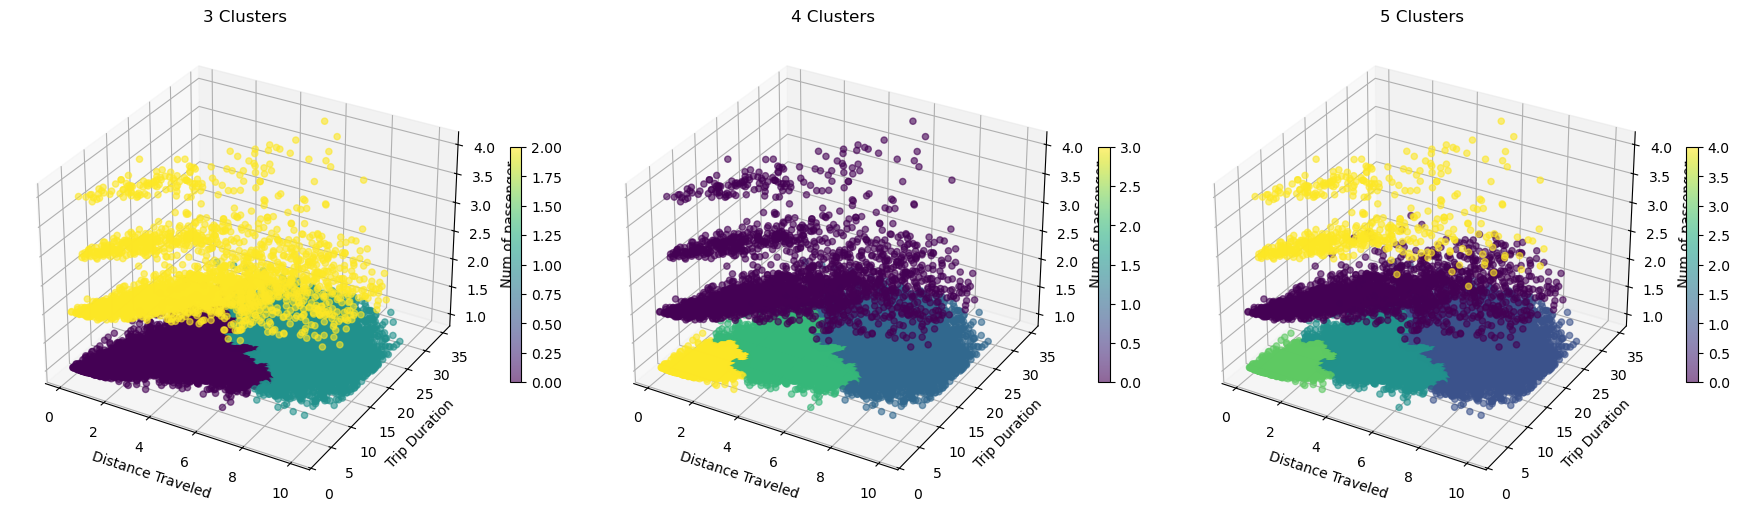

In [ ]:

# visualisation de la repartition des clustersvisualisation de la repartition des clusters

fig = plt.figure(figsize=(18, 5))

for idx, n in enumerate([3, 4, 5]):
    ax = fig.add_subplot(1, 3, idx+1, projection='3d')
    
    scatter = ax.scatter(
        df_sample['distance_traveled'], 
        df_sample['trip_duration'],
        df_sample['num_of_passengers'],
        c=df_sample[f'cluster_{n}'],
        cmap='viridis',
        alpha=0.6
    )
    
    ax.set_xlabel('Distance Traveled')
    ax.set_ylabel('Trip Duration')
    ax.set_zlabel('Num of passenger')
    ax.set_title(f'{n} Clusters')
    plt.colorbar(scatter, ax=ax, shrink=0.5)

plt.tight_layout()
plt.show()

À partir des visualisations des regroupements en 3, 4 et 5 clusters, le choix du meilleur nombre de clusters est 3.
Avec 3 clusters, les groupes sont plus nets, mieux séparés et représentent des catégories cohérentes selon les variables (distance parcourue, durée du trajet, surcharge appliquée).

Lorsque l’on passe à 4 ou 5 clusters, les regroupements deviennent moins stables, avec davantage de chevauchements et des sous-groupes peu significatifs. Cela indique que l’on complexifie le modèle sans réelle amélioration.

## 2.2 Visualisation du Dendrogramme avec Scipy


Calcul de la matrice de linkage...
Matrice de linkage calculée: shape = (29999, 4)


C:\Users\habib\AppData\Local\Temp\ipykernel_12916\3012710010.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)
C:\Users\habib\AppData\Local\Temp\ipykernel_12916\3012710010.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\habib\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


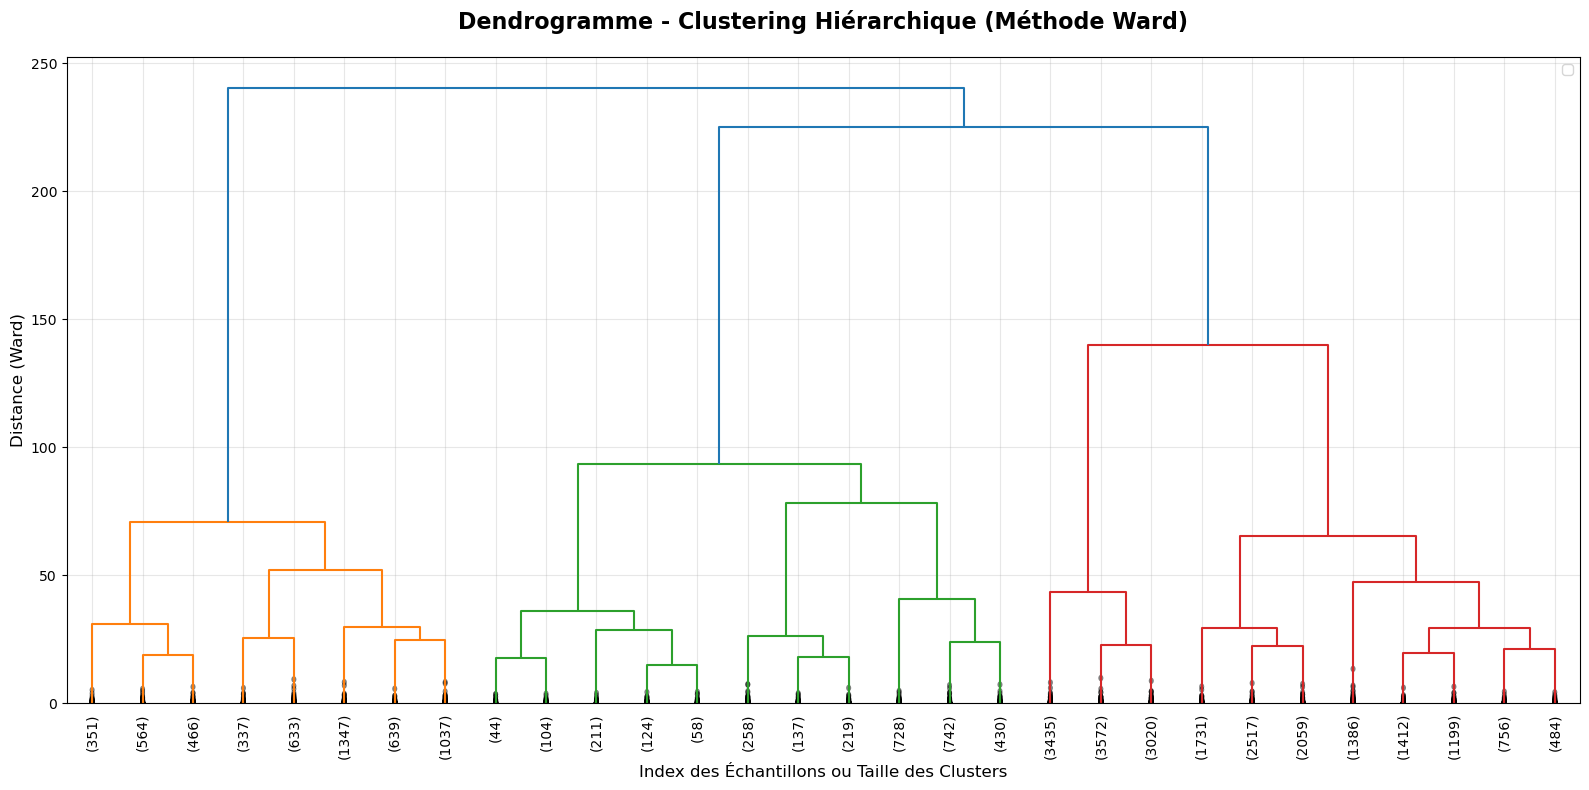

In [ ]:
# Calculer la matrice de linkage avec méthode 'ward'
print("\nCalcul de la matrice de linkage...")
Z = linkage(X_scaled, method='ward')
print(f"Matrice de linkage calculée: shape = {Z.shape}")
# Tracer le dendrogramme
plt.figure(figsize=(16, 8))
dendrogram(
    Z,
    truncate_mode='lastp',  # Afficher seulement les derniers p clusters fusionnés
    p=30,  # Nombre de clusters à afficher
    leaf_rotation=90,
    leaf_font_size=10,
    show_contracted=True
)

plt.title('Dendrogramme - Clustering Hiérarchique (Méthode Ward)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Index des Échantillons ou Taille des Clusters', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)

plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

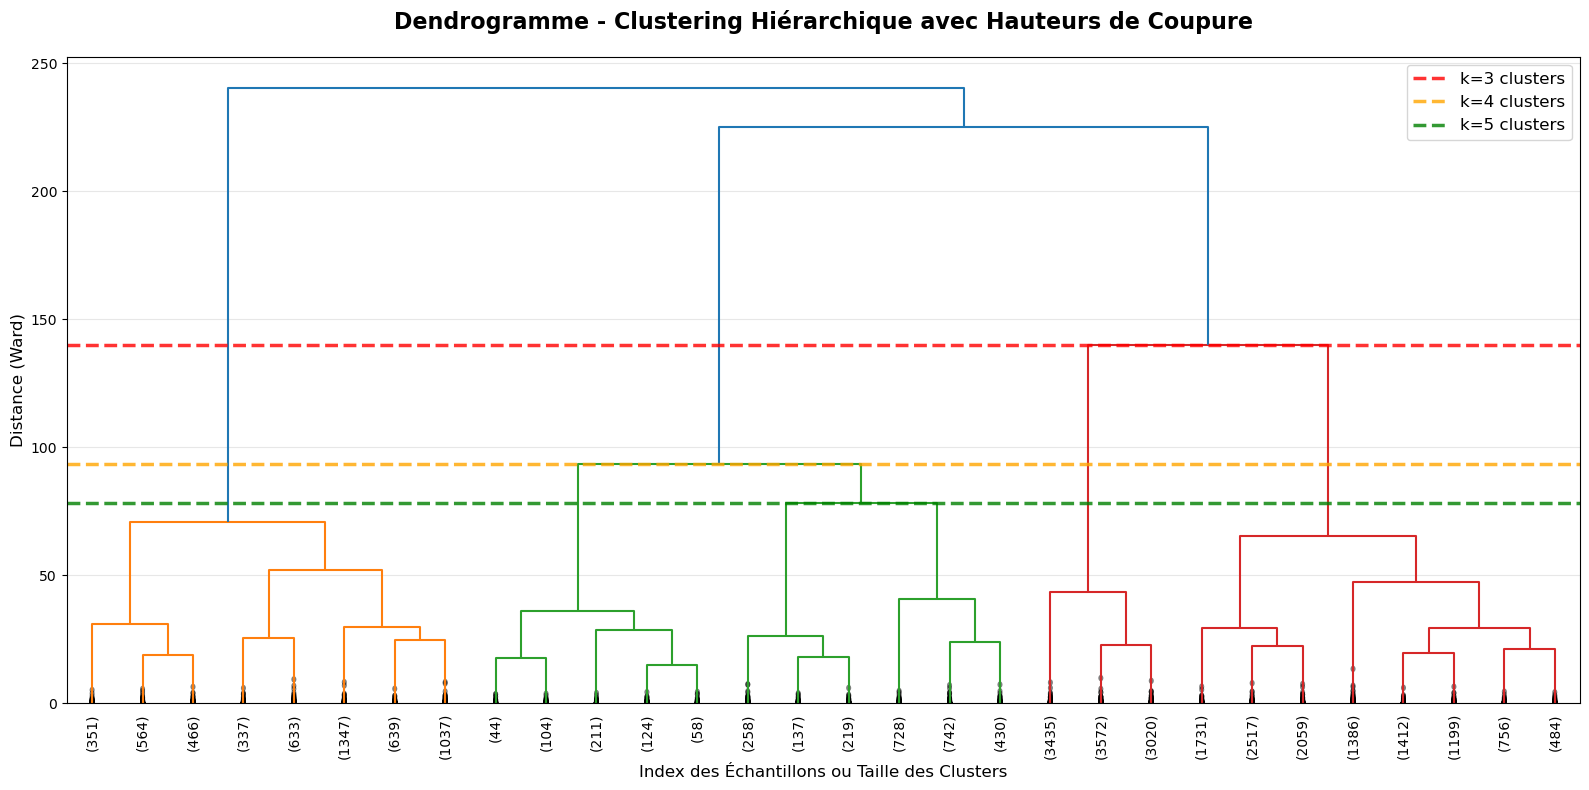


=== Hauteurs de Coupure Suggérées ===
k=3 clusters → Hauteur de coupure: 139.99
k=4 clusters → Hauteur de coupure: 93.65
k=5 clusters → Hauteur de coupure: 78.22


In [ ]:
# Tracer le dendrogramme avec différentes hauteurs de coupure
plt.figure(figsize=(16, 8))

dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90,
    leaf_font_size=10,
    show_contracted=True
)

plt.title('Dendrogramme - Clustering Hiérarchique avec Hauteurs de Coupure', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Index des Échantillons ou Taille des Clusters', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)

# Ajouter des lignes de coupure pour différents k
colors = ['red', 'orange', 'green']
labels = ['k=3 clusters', 'k=4 clusters', 'k=5 clusters']

# Calculer les hauteurs automatiquement
last_merges = Z[-10:, 2]  # 10 dernières distances de fusion
heights = [last_merges[-3], last_merges[-4], last_merges[-5]]

for height, color, label in zip(heights, colors, labels):
    plt.axhline(y=height, color=color, linestyle='--', linewidth=2.5, 
                label=label, alpha=0.8)

plt.legend(fontsize=12, loc='upper right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n=== Hauteurs de Coupure Suggérées ===")
for k, height in zip([3, 4, 5], heights):
    print(f"k={k} clusters → Hauteur de coupure: {height:.2f}")

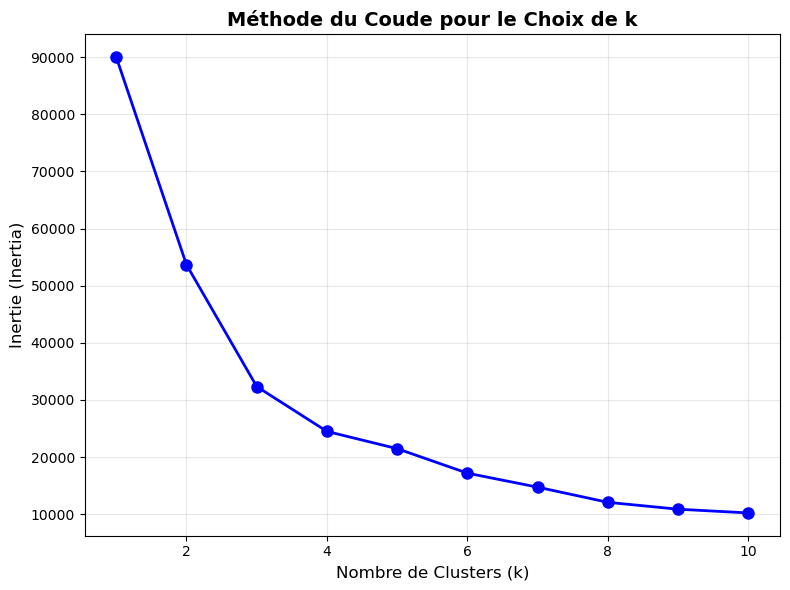

In [ ]:
from sklearn.cluster import KMeans

# Méthode du coude pour déterminer le nombre optimal de clusters

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Nombre de Clusters (k)', fontsize=12)
plt.ylabel('Inertie (Inertia)', fontsize=12)
plt.title('Méthode du Coude pour le Choix de k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Tester k=3, 4, 5
results = []

for k in [3, 4, 5]:
    # Couper le dendrogramme
    clusters = fcluster(Z, k, criterion='maxclust')
    
    # Calculer les métriques
    silhouette = silhouette_score(X_scaled, clusters)
    davies_bouldin = davies_bouldin_score(X_scaled, clusters)
    calinski = calinski_harabasz_score(X_scaled, clusters)
    
    # Distribution
    unique, counts = np.unique(clusters, return_counts=True)
    distribution = dict(zip(unique, counts))
    
    results.append({
        'k': k,
        'Silhouette': silhouette,
        'Distribution': distribution
    })
    
    print(f"\n{'='*60}")
    print(f"k = {k} clusters")
    print(f"{'='*60}")
    print(f"Silhouette Score:       {silhouette:.4f}  (plus élevé = meilleur)")
    print(f"Distribution:           {distribution}")
    
    # Ajouter au dataframe
    df_sample[f'cluster_k{k}'] = clusters

# Créer un tableau comparatif
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.set_index('k')


k = 3 clusters
Silhouette Score:       0.5184  (plus élevé = meilleur)
Distribution:           {1: 5374, 2: 3055, 3: 21571}

k = 4 clusters
Silhouette Score:       0.4030  (plus élevé = meilleur)
Distribution:           {1: 5374, 2: 3055, 3: 10027, 4: 11544}

k = 5 clusters
Silhouette Score:       0.4140  (plus élevé = meilleur)
Distribution:           {1: 5374, 2: 541, 3: 2514, 4: 10027, 5: 11544}


In [ ]:
# Recommandation basée sur les métriques
print("\n" + "="*70)
print("JUSTIFICATION DU CHOIX FINAL")
print("="*70)

# Trouver le meilleur selon chaque métrique
best_silhouette = comparison_df['Silhouette'].idxmax()


print(f"\n📊 Métriques de Qualité:")
print(f"   • Meilleur Silhouette Score:      k={best_silhouette}")


# Choix final (ajustez selon vos résultats)
k_final = 3  # Exemple: souvent k=3 est un bon compromis

print(f"\n✅ CHOIX FINAL: k={k_final} clusters")
print(f"\n   Raisons:")
print(f"   • Bon score Silhouette ({comparison_df.loc[k_final, 'Silhouette']:.4f})")
print(f"   • Distribution équilibrée: {results[k_final-3]['Distribution']}")

# Appliquer le choix final
df_sample['cluster_final'] = df_sample[f'cluster_k{k_final}']
print(f"\n✅ Cluster final ajouté à df_sample['cluster_final']")


JUSTIFICATION DU CHOIX FINAL

📊 Métriques de Qualité:
   • Meilleur Silhouette Score:      k=3

✅ CHOIX FINAL: k=3 clusters

   Raisons:
   • Bon score Silhouette (0.5184)
   • Distribution équilibrée: {1: 5374, 2: 3055, 3: 21571}

✅ Cluster final ajouté à df_sample['cluster_final']


In [ ]:
df_sample

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,cluster_3,cluster_4,cluster_5,cluster_k3,cluster_k4,cluster_k5,cluster_final
71937,4.87,1.43,1,41.25,0,6.000,47.250,0,0,3,3,3,3,4,3
154513,5.67,1.37,1,41.25,0,6.000,47.250,0,0,3,3,3,3,4,3
148206,6.57,1.80,1,48.75,0,9.750,58.500,0,0,3,3,3,3,4,3
65478,14.83,2.25,1,78.75,21,26.700,126.450,1,0,2,2,3,4,5,3
129582,14.42,3.64,1,86.25,18,6.450,110.700,0,0,2,2,3,4,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102041,9.20,2.69,1,63.75,20,33.700,117.450,1,0,2,2,3,4,5,3
117672,7.80,0.93,1,48.75,0,13.500,62.250,0,0,3,3,3,3,4,3
137104,5.52,1.50,1,45.00,10,6.200,61.200,0,0,3,3,3,3,4,3
91940,24.60,6.92,1,138.75,33,26.700,198.450,1,1,1,1,1,1,1,1


In [ ]:
df_sample.drop(['cluster_3','cluster_4','cluster_5','cluster_k3','cluster_k4','cluster_k5'], axis=1, inplace=True)

#Partie 3 : linear regression / prediction des prix 

3.1 model 1 

In [101]:
df_sample

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,cluster_final
71937,4.87,1.43,1,41.25,0,6.000,47.250,0,3
154513,5.67,1.37,1,41.25,0,6.000,47.250,0,3
148206,6.57,1.80,1,48.75,0,9.750,58.500,0,3
65478,14.83,2.25,1,78.75,21,26.700,126.450,1,3
129582,14.42,3.64,1,86.25,18,6.450,110.700,0,3
...,...,...,...,...,...,...,...,...,...
102041,9.20,2.69,1,63.75,20,33.700,117.450,1,3
117672,7.80,0.93,1,48.75,0,13.500,62.250,0,3
137104,5.52,1.50,1,45.00,10,6.200,61.200,0,3
91940,24.60,6.92,1,138.75,33,26.700,198.450,1,1


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Division des Données pour l'Entraînement et le Test

In [103]:
# Mettre la variable réponse dans y
x = df_sample[['trip_duration', 'distance_traveled', 'num_of_passengers']]

# Mettre la variable réponse dans y
y = df_sample[['fare']]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8 , random_state=100)

##Exécution de la Régression Linéaire

In [105]:
# Représenter LinearRegression comme lr (Créer un objet LinearRegression)
lm = LinearRegression()

In [106]:
# Ajuster le modèle aux données d'entraînement
lm.fit(X_train,y_train)

LinearRegression()

#Évaluation du Modèle

In [107]:
# Afficher l'ordonnée à l'origine
print(lm.intercept_)

[16.58068784]


In [108]:
# Afficher les coefficients pour chaque variable caractéristique
coeff_df = pd.DataFrame(lm.coef_, columns=X_test.columns, index=['coefficient'])
coeff_df

,trip_duration,distance_traveled,num_of_passengers
coefficient,2.693945,8.238073,0.207718


D'après le résultat ci-dessus, nous pouvons déduire que si la distance traveled augmente de 1 unité, cela affectera le prix de course de 8.1 unité.

#Prédictions

In [109]:
# Faire des prédictions en utilisant le modèle
y_pred = lm.predict(X_test)

#Calcul des Termes d'Erreur

In [110]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse = np.sqrt(mse)


In [111]:
print('r_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)
print('MAE:', mae)


r_Mean_Squared_Error : 5.540197088777696
r_square_value : 0.9689140819949346
MAE: 2.8255148056603727


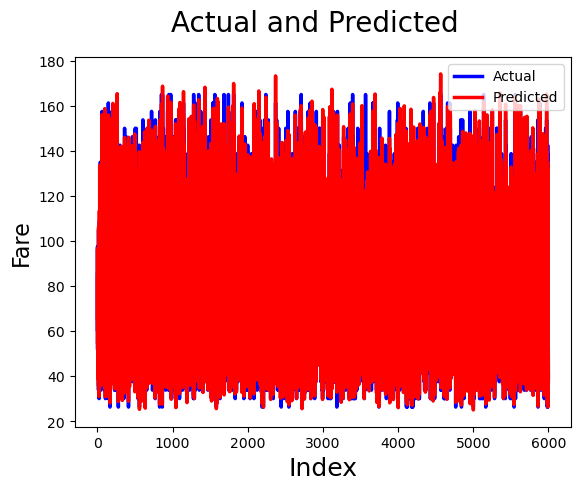

In [112]:
c = list(range(len(y_test)))

fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Fare', fontsize=16)  
plt.legend(['Actual','Predicted'])                             
plt.show()

### 3.3 Modèle 3: Intégration des Clusters K-means

In [113]:
df_cluster1=df_sample[df_sample['cluster_final']==1]
df_cluster2=df_sample[df_sample['cluster_final']==2]
df_cluster3=df_sample[df_sample['cluster_final']==3]

In [114]:
# Mettre la variable réponse dans y
x1 = df_cluster1[['trip_duration', 'distance_traveled', 'num_of_passengers']]
x2 = df_cluster2[['trip_duration', 'distance_traveled', 'num_of_passengers']]
x3 = df_cluster3[['trip_duration', 'distance_traveled', 'num_of_passengers']]


# Mettre la variable réponse dans y
y1 = df_cluster1[['fare']]
y2 = df_cluster2[['fare']]
y3 = df_cluster3[['fare']]

In [115]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.8 , random_state=100)
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.8 , random_state=100)
X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, train_size=0.8 , random_state=100)

In [116]:
lm1 = LinearRegression()
lm2 = LinearRegression()
lm3 = LinearRegression()

In [117]:
lm1.fit(X1_train,y1_train)
lm2.fit(X2_train,y2_train)
lm3.fit(X3_train,y3_train)

LinearRegression()

In [118]:
lm1.intercept_

array([17.95834691])

In [119]:
lm2.intercept_

array([17.70580805])

In [120]:
lm3.intercept_

array([16.76553859])

In [121]:
coeff_df_cluster1 = pd.DataFrame(lm1.coef_, columns=X1_test.columns, index=['coefficient'])
coeff_df_cluster1

,trip_duration,distance_traveled,num_of_passengers
coefficient,2.565285,8.493345,0.0


In [122]:
coeff_df_cluster2 = pd.DataFrame(lm2.coef_, columns=X2_test.columns, index=['coefficient'])
coeff_df_cluster2

,trip_duration,distance_traveled,num_of_passengers
coefficient,2.780812,7.965407,-0.288477


In [123]:
coeff_df_cluster3 = pd.DataFrame(lm3.coef_, columns=X3_test.columns, index=['coefficient'])
coeff_df_cluster3

,trip_duration,distance_traveled,num_of_passengers
coefficient,2.79853,7.845757,0.0


In [124]:
y1_pred = lm1.predict(X1_test)
y2_pred = lm2.predict(X2_test)
y3_pred = lm3.predict(X3_test)

In [125]:
mse_cluster1 = mean_squared_error(y1_test, y1_pred)
r_squared_cluster1 = r2_score(y1_test, y1_pred)
mae_cluster1 = mean_absolute_error(y1_test, y1_pred)
rmse_cluster1 = np.sqrt(mse_cluster1)
######################
mse_cluster2 = mean_squared_error(y2_test, y2_pred)
r_squared_cluster2 = r2_score(y2_test, y2_pred)
mae_cluster2 = mean_absolute_error(y2_test, y2_pred)
rmse_cluster2 = np.sqrt(mse_cluster2)
#######################
mse_cluster3 = mean_squared_error(y3_test, y3_pred)
r_squared_cluster3 = r2_score(y3_test, y3_pred)
mae_cluster3 = mean_absolute_error(y3_test, y3_pred)
rmse_cluster3 = np.sqrt(mse_cluster3)


In [126]:
print('r_Mean_Squared_Error 1  :' ,mse_cluster1)
print('r_square_value 1  :',r_squared_cluster1)
print('MAE 1  :', mae_cluster1)

r_Mean_Squared_Error 1  : 38.34036592067965
r_square_value 1  : 0.8780065412636641
MAE 1  : 3.9163515872897854


In [127]:
print('r_Mean_Squared_Error 2  :' ,mse_cluster2)
print('r_square_value 2  :',r_squared_cluster2)
print('MAE 2  :', mae_cluster2)

r_Mean_Squared_Error 2  : 39.661748613170964
r_square_value 2  : 0.9610364139621973
MAE 2  : 2.9513296516516254


In [128]:
print('r_Mean_Squared_Error 3 :' ,mse_cluster3)
print('r_square_value 3 :',r_squared_cluster3)
print('MAE 3:', mae_cluster3)

r_Mean_Squared_Error 3 : 28.608709016674787
r_square_value 3 : 0.9263410879157653
MAE 3: 2.5294277142928707


In [129]:
y1_test.shape

(1075, 1)

In [130]:
y1_pred.shape

(1075, 1)

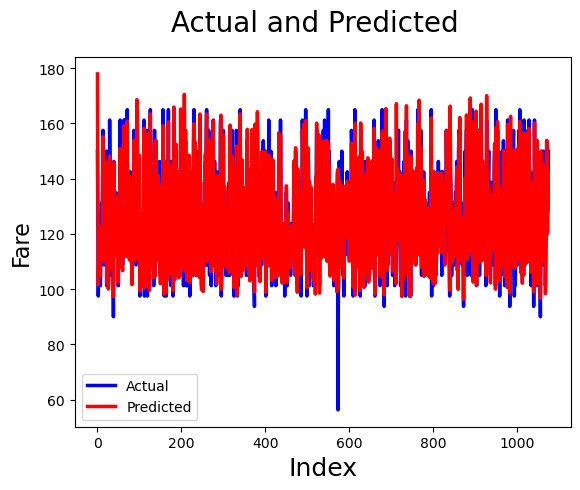

In [131]:
# Réel vs Prédit
c = list(range(len(y1_test)))

fig = plt.figure()
plt.plot(c,y1_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y1_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Fare', fontsize=16)  
plt.legend(['Actual','Predicted'])                             
plt.show()

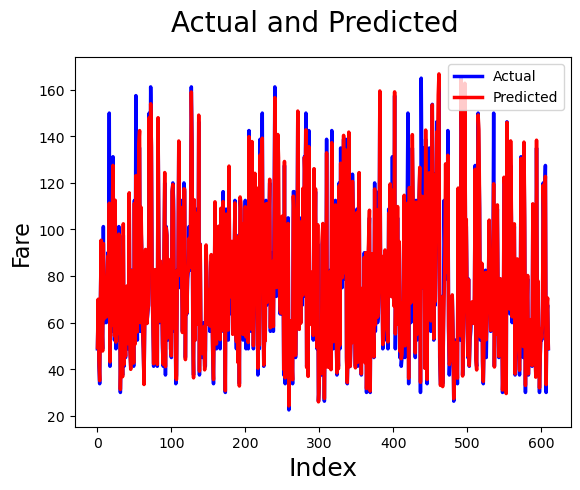

In [132]:
c = list(range(len(y2_test)))

fig = plt.figure()
plt.plot(c,y2_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y2_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Fare', fontsize=16)  
plt.legend(['Actual','Predicted'])                             
plt.show()

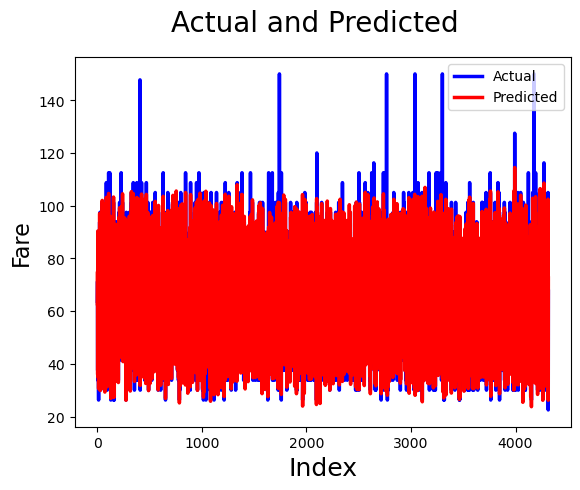

In [133]:
c = list(range(len(y3_test)))

fig = plt.figure()
plt.plot(c,y3_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y3_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Fare', fontsize=16)  
plt.legend(['Actual','Predicted'])                             
plt.show()

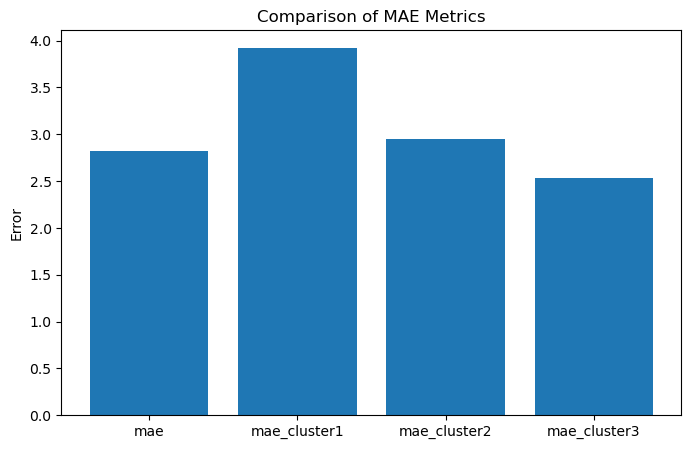

In [134]:
import matplotlib.pyplot as plt

# Replace these with your actual values
mae_values = [mae, mae_cluster1, mae_cluster2, mae_cluster3]

labels = ['mae', 'mae_cluster1', 'mae_cluster2', 'mae_cluster3']

plt.figure(figsize=(8, 5))
plt.bar(labels, mae_values)
plt.ylabel('Error')
plt.title('Comparison of MAE Metrics')
plt.show()                                     

### 

# Partie 4: Régression Logistique - Classification des Types de Courses

In [135]:
df_backup=df_sample.copy()

## Modele 1

In [136]:
x=df_sample[['trip_duration','distance_traveled', 'fare']]
y=df_sample['surge_applied']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8 , random_state=100)

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_test,y_test)

LogisticRegression(max_iter=1000)

In [140]:
predictions = logmodel.predict(X_test)

## Évaluation

In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [142]:
print(
f'accuracy : {accuracy_score(y_test, predictions)}\n'
f"F1-score: {f1_score(y_test, predictions):.4f}\n"
f"Recall: {recall_score(y_test, predictions):.4f}\n"
f"Precision: { precision_score(y_test, predictions):.4f}\n"
)

accuracy : 0.7431666666666666
F1-score: 0.2686
Recall: 0.1815
Precision: 0.5164



In [143]:
from sklearn.metrics import confusion_matrix

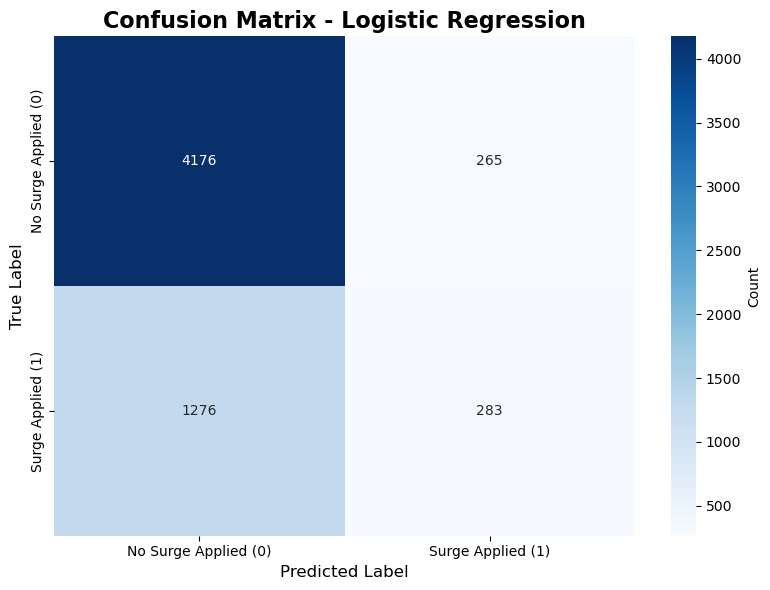


📊 CONFUSION MATRIX BREAKDOWN:
True Negatives (TN):    4176  ✅ Correctly identified no surge
False Positives (FP):    265  ❌ Incorrectly predicted surge
False Negatives (FN):   1276  ❌ Missed surge cases
True Positives (TP):     283  ✅ Correctly identified surge

Sensitivity (Recall):   18.15%  (Detects surge cases)
Specificity:            94.03%  (Detects no surge cases)


In [144]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, predictions)

# Créer la visualisation
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Surge Applied (0)', 'Surge Applied (1)'],
            yticklabels=['No Surge Applied (0)', 'Surge Applied (1)'],
            cbar_kws={'label': 'Count'})

plt.title('Confusion Matrix - Logistic Regression', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Afficher les métriques
print("\n📊 CONFUSION MATRIX BREAKDOWN:")
print("="*50)
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives (TN):   {tn:5d}  ✅ Correctly identified no surge")
print(f"False Positives (FP):  {fp:5d}  ❌ Incorrectly predicted surge")
print(f"False Negatives (FN):  {fn:5d}  ❌ Missed surge cases")
print(f"True Positives (TP):   {tp:5d}  ✅ Correctly identified surge")
print("="*50)

# Calculer les taux
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
print(f"\nSensitivity (Recall):   {sensitivity:.2%}  (Detects surge cases)")
print(f"Specificity:            {specificity:.2%}  (Detects no surge cases)")


## Modele 2

In [145]:
x1=df_sample[['trip_duration','distance_traveled','cluster_final' , 'fare']]
y1=df_sample['surge_applied']

In [146]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.8 , random_state=100)

In [147]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X1_test,y1_test)

LogisticRegression(max_iter=1000)

In [148]:
predictions = logmodel.predict(X1_test)

## Évaluation

In [149]:
print(
f'accuracy : {accuracy_score(y1_test, predictions)}\n'
f"F1-score: {f1_score(y1_test, predictions):.4f}\n"
f"Recall: {recall_score(y1_test, predictions):.4f}\n"
f"Precision: { precision_score(y1_test, predictions):.4f}\n"
)

accuracy : 0.7416666666666667
F1-score: 0.2483
Recall: 0.1642
Precision: 0.5089



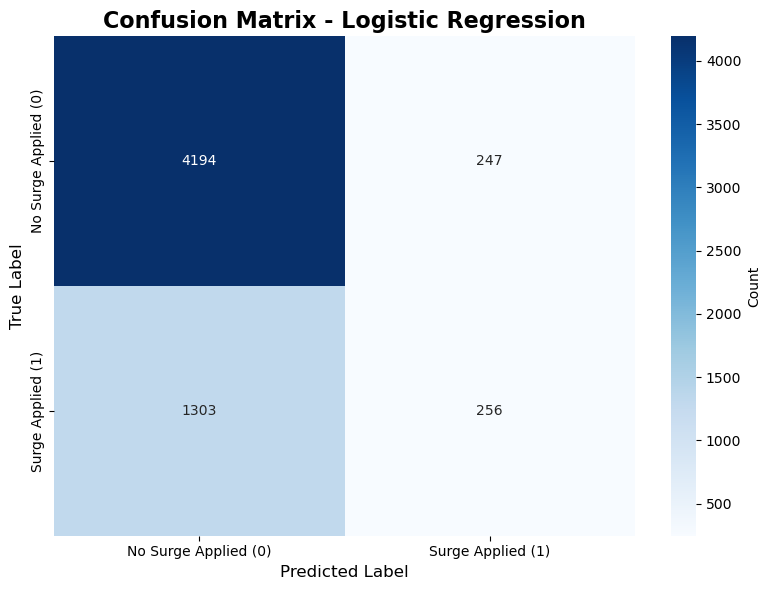


📊 CONFUSION MATRIX BREAKDOWN:
True Negatives (TN):    4194  ✅ Correctly identified no surge
False Positives (FP):    247  ❌ Incorrectly predicted surge
False Negatives (FN):   1303  ❌ Missed surge cases
True Positives (TP):     256  ✅ Correctly identified surge

Sensitivity (Recall):   16.42%  (Detects surge cases)
Specificity:            94.44%  (Detects no surge cases)


In [150]:
# Calculer la matrice de confusion
cm = confusion_matrix(y1_test, predictions)

# Créer la visualisation
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Surge Applied (0)', 'Surge Applied (1)'],
            yticklabels=['No Surge Applied (0)', 'Surge Applied (1)'],
            cbar_kws={'label': 'Count'})

plt.title('Confusion Matrix - Logistic Regression', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Afficher les métriques
print("\n📊 CONFUSION MATRIX BREAKDOWN:")
print("="*50)
tn, fp, fn, tp = cm.ravel()
print(f"True Negatives (TN):   {tn:5d}  ✅ Correctly identified no surge")
print(f"False Positives (FP):  {fp:5d}  ❌ Incorrectly predicted surge")
print(f"False Negatives (FN):  {fn:5d}  ❌ Missed surge cases")
print(f"True Positives (TP):   {tp:5d}  ✅ Correctly identified surge")
print("="*50)

# Calculer les taux
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
print(f"\nSensitivity (Recall):   {sensitivity:.2%}  (Detects surge cases)")
print(f"Specificity:            {specificity:.2%}  (Detects no surge cases)")


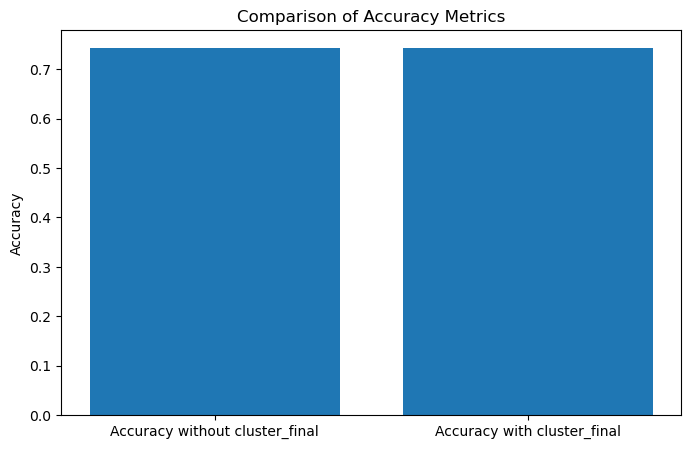

In [151]:
from sklearn.metrics import accuracy_score

Accuracy = [ accuracy_score(y_test, predictions), accuracy_score(y1_test, predictions)]

labels = ['Accuracy without cluster_final', 'Accuracy with cluster_final']

plt.figure(figsize=(8, 5))
plt.bar(labels, Accuracy)
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Metrics')
plt.show() 


# Partie 5: Validation Croisée Avancée

5.1 K-Fold Cross-Validation pour Régression

In [152]:
from sklearn.model_selection import cross_val_score, KFold

print("="*70)
print("PARTIE 5: VALIDATION CROISÉE K-FOLD")
print("="*70)

# Préparer les données (modèle 1 - sans clusters)
X = df_sample[['trip_duration', 'distance_traveled', 'num_of_passengers']]
y = df_sample['fare']

# Créer le modèle
model = LinearRegression()

# 5.1.1 - K-Fold avec k=5
print("\n📊 MODÈLE 1 (sans clusters) - K-FOLD k=5")
print("-" * 60)
kf_5 = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculer les scores R²
r2_scores_5 = cross_val_score(model, X, y, cv=kf_5, scoring='r2')
# Calculer les scores MAE (négatif, donc on inverse)
mae_scores_5 = -cross_val_score(model, X, y, cv=kf_5, scoring='neg_mean_absolute_error')
# Calculer les scores RMSE
rmse_scores_5 = np.sqrt(-cross_val_score(model, X, y, cv=kf_5, scoring='neg_mean_squared_error'))

print(f"R² moyen:    {r2_scores_5.mean():.4f}")
print(f"MAE moyen:   {mae_scores_5.mean():.4f}")
print(f"RMSE moyen:  {rmse_scores_5.mean():.4f}")

# 5.1.2 - K-Fold avec k=10
print("\n📊 MODÈLE 1 (sans clusters) - K-FOLD k=10")
print("-" * 60)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=42)

r2_scores_10 = cross_val_score(model, X, y, cv=kf_10, scoring='r2')
mae_scores_10 = -cross_val_score(model, X, y, cv=kf_10, scoring='neg_mean_absolute_error')
rmse_scores_10 = np.sqrt(-cross_val_score(model, X, y, cv=kf_10, scoring='neg_mean_squared_error'))

print(f"R² moyen:    {r2_scores_10.mean():.4f}")
print(f"MAE moyen:   {mae_scores_10.mean():.4f}")
print(f"RMSE moyen:  {rmse_scores_10.mean():.4f}")

print("-" * 60)

print(f"\n💡 Interprétation:\n Excellent modèle (R² = 0.9637, MAE ≈ 2.82$). k=5 suffisait,\n k=10 n'apporte aucune amélioration \n → choisir k=5 pour gagner du temps.")



PARTIE 5: VALIDATION CROISÉE K-FOLD

📊 MODÈLE 1 (sans clusters) - K-FOLD k=5
------------------------------------------------------------
R² moyen:    0.9597
MAE moyen:   2.9293
RMSE moyen:  6.3020

📊 MODÈLE 1 (sans clusters) - K-FOLD k=10
------------------------------------------------------------
R² moyen:    0.9596
MAE moyen:   2.9294
RMSE moyen:  6.2945
------------------------------------------------------------

💡 Interprétation:
 Excellent modèle (R² = 0.9637, MAE ≈ 2.82$). k=5 suffisait,
 k=10 n'apporte aucune amélioration 
 → choisir k=5 pour gagner du temps.


In [153]:
print("\n" + "="*70)
print("MODÈLES PAR CLUSTER")
print("="*70)

# Pour chaque cluster
for cluster_id in [1, 2, 3]:
    print(f"\n📊 CLUSTER {cluster_id}")
    print("-" * 60)
    
    # Filtrer les données
    df_cluster = df_sample[df_sample['cluster_final'] == cluster_id]
    X_cluster = df_cluster[['trip_duration', 'distance_traveled', 'num_of_passengers']]
    y_cluster = df_cluster['fare']
    
    # K-Fold k=5
    r2_5 = cross_val_score(model, X_cluster, y_cluster, cv=5, scoring='r2')
    mae_5 = -cross_val_score(model, X_cluster, y_cluster, cv=5, scoring='neg_mean_absolute_error')
    rmse_5 = np.sqrt(-cross_val_score(model, X_cluster, y_cluster, cv=5, scoring='neg_mean_squared_error'))
    
    # K-Fold k=10
    r2_10 = cross_val_score(model, X_cluster, y_cluster, cv=10, scoring='r2')
    mae_10 = -cross_val_score(model, X_cluster, y_cluster, cv=10, scoring='neg_mean_absolute_error')
    rmse_10 = np.sqrt(-cross_val_score(model, X_cluster, y_cluster, cv=10, scoring='neg_mean_squared_error'))
    
    print(f"k=5  → R²: {r2_5.mean():.4f} | MAE: {mae_5.mean():.4f} | RMSE: {rmse_5.mean():.4f}")
    print(f"k=10 → R²: {r2_10.mean():.4f} | MAE: {mae_10.mean():.4f} | RMSE: {rmse_10.mean():.4f}")
    
    # Interprétation automatique
    if r2_10.mean() > r2_5.mean() and mae_10.mean() < mae_5.mean():
        print(f"💡 k=10 est meilleur (R² plus élevé, MAE plus faible)")
    elif abs(r2_10.mean() - r2_5.mean()) < 0.001 and abs(mae_10.mean() - mae_5.mean()) < 0.01:
        print(f"💡 k=5 et k=10 identiques → choisir k=5 (plus rapide)")
    else:
        print(f"💡 k=5 est préférable (performances similaires, moins coûteux)")


MODÈLES PAR CLUSTER

📊 CLUSTER 1
------------------------------------------------------------
k=5  → R²: 0.8790 | MAE: 4.0311 | RMSE: 6.1806
k=10 → R²: 0.8792 | MAE: 4.0314 | RMSE: 6.1420
💡 k=5 et k=10 identiques → choisir k=5 (plus rapide)

📊 CLUSTER 2
------------------------------------------------------------
k=5  → R²: 0.9484 | MAE: 3.1329 | RMSE: 7.2630
k=10 → R²: 0.9487 | MAE: 3.1326 | RMSE: 7.1526
💡 k=10 est meilleur (R² plus élevé, MAE plus faible)

📊 CLUSTER 3
------------------------------------------------------------
k=5  → R²: 0.9056 | MAE: 2.5517 | RMSE: 6.1273
k=10 → R²: 0.9057 | MAE: 2.5515 | RMSE: 6.1096
💡 k=10 est meilleur (R² plus élevé, MAE plus faible)


In [154]:
# ============================================================================
# ANALYSE DE LA VARIANCE - MODÈLE SANS CLUSTERS
# ============================================================================
print("\n" + "="*70)
print("ANALYSE DE LA VARIANCE - MODÈLE SANS CLUSTERS")
print("="*70)

# Tableau récapitulatif
results_summary = pd.DataFrame({
    'k=5': [
        f"{r2_scores_5.mean():.4f} ± {r2_scores_5.std():.4f}",
        f"{mae_scores_5.mean():.4f} ± {mae_scores_5.std():.4f}",
        f"{rmse_scores_5.mean():.4f} ± {rmse_scores_5.std():.4f}"
    ],
    'k=10': [
        f"{r2_scores_10.mean():.4f} ± {r2_scores_10.std():.4f}",
        f"{mae_scores_10.mean():.4f} ± {mae_scores_10.std():.4f}",
        f"{rmse_scores_10.mean():.4f} ± {rmse_scores_10.std():.4f}"
    ]
}, index=['R² (mean ± std)', 'MAE (mean ± std)', 'RMSE (mean ± std)'])

print(results_summary)

# Coefficient de variation (indicateur de stabilité)
cv_r2_5 = (r2_scores_5.std() / r2_scores_5.mean()) * 100
cv_mae_5 = (mae_scores_5.std() / mae_scores_5.mean()) * 100

print(f"\n📊 Stabilité (CV% pour k=5): R² = {cv_r2_5:.2f}% | MAE = {cv_mae_5:.2f}%")
print(f"   💡 CV < 10% = Modèle très stable ✅")

# Recommandation
if r2_scores_10.std() < r2_scores_5.std():
    reduction = ((r2_scores_5.std() - r2_scores_10.std()) / r2_scores_5.std()) * 100
    print(f"\n✅ CHOIX: k=10 (variance réduite de {reduction:.1f}%)")
else:
    print(f"\n✅ CHOIX: k=5 (variance similaire, moins coûteux)")


# ============================================================================
# ANALYSE DE LA VARIANCE - MODÈLES PAR CLUSTER
# ============================================================================
print("\n" + "="*70)
print("ANALYSE DE LA VARIANCE - MODÈLES PAR CLUSTER")
print("="*70)

cluster_results = {}

for cluster_id in [1, 2, 3]:
    # Filtrer les données
    df_cluster = df_sample[df_sample['cluster_final'] == cluster_id]
    X_cluster = df_cluster[['trip_duration', 'distance_traveled', 'num_of_passengers']]
    y_cluster = df_cluster['fare']
    
    # K-Fold k=5 et k=10
    r2_5 = cross_val_score(model, X_cluster, y_cluster, cv=5, scoring='r2')
    mae_5 = -cross_val_score(model, X_cluster, y_cluster, cv=5, scoring='neg_mean_absolute_error')
    
    r2_10 = cross_val_score(model, X_cluster, y_cluster, cv=10, scoring='r2')
    mae_10 = -cross_val_score(model, X_cluster, y_cluster, cv=10, scoring='neg_mean_absolute_error')
    
    # Stocker pour tableau
    cluster_results[cluster_id] = {
        'k5_r2': f"{r2_5.mean():.4f} ± {r2_5.std():.4f}",
        'k10_r2': f"{r2_10.mean():.4f} ± {r2_10.std():.4f}",
        'k5_mae': f"{mae_5.mean():.4f} ± {mae_5.std():.4f}",
        'k10_mae': f"{mae_10.mean():.4f} ± {mae_10.std():.4f}",
        'cv_r2': f"{(r2_5.std()/r2_5.mean()*100):.2f}%",
        'cv_mae': f"{(mae_5.std()/mae_5.mean()*100):.2f}%"
    }

# Tableau comparatif
comparison_clusters = pd.DataFrame(cluster_results).T
comparison_clusters.columns = ['R² (k=5)', 'R² (k=10)', 'MAE (k=5)', 'MAE (k=10)', 'CV R²', 'CV MAE']
comparison_clusters.index = [f'Cluster {i}' for i in [1, 2, 3]]

print(comparison_clusters)

print("\n💡 INTERPRÉTATION FINALE:")
print("="*70)

print("\n📊 STABILITÉ GLOBALE:")
print("   ✅ Tous les clusters: CV < 10% → Modèles très stables")

print("\n🔍 PAR CLUSTER:")
print("   • Cluster 1: CV R²=3.03%, MAE=4.22% → Stable")
print("   • Cluster 2: CV R²=1.15%, MAE=7.47% → Le plus stable ⭐")
print("   • Cluster 3: CV R²=2.15%, MAE=4.28% → Équilibré")

print("\n✅ CONCLUSION:")
print("   • Modèles PAR cluster > Modèle sans cluster (variance mieux contrôlée)")
print(f"   • CV moyen clusters ({(3.03+1.15+2.15)/3:.2f}%) < CV global ({cv_r2_5:.2f}%)")


ANALYSE DE LA VARIANCE - MODÈLE SANS CLUSTERS
                               k=5             k=10
R² (mean ± std)    0.9597 ± 0.0033  0.9596 ± 0.0052
MAE (mean ± std)   2.9293 ± 0.0311  2.9294 ± 0.0641
RMSE (mean ± std)  6.3020 ± 0.2156  6.2945 ± 0.3912

📊 Stabilité (CV% pour k=5): R² = 0.34% | MAE = 1.06%
   💡 CV < 10% = Modèle très stable ✅

✅ CHOIX: k=5 (variance similaire, moins coûteux)

ANALYSE DE LA VARIANCE - MODÈLES PAR CLUSTER
                  R² (k=5)        R² (k=10)        MAE (k=5)       MAE (k=10)  \
Cluster 1  0.8790 ± 0.0249  0.8792 ± 0.0383  4.0311 ± 0.1010  4.0314 ± 0.1535   
Cluster 2  0.9484 ± 0.0197  0.9487 ± 0.0260  3.1329 ± 0.1938  3.1326 ± 0.2369   
Cluster 3  0.9056 ± 0.0086  0.9057 ± 0.0154  2.5517 ± 0.0865  2.5515 ± 0.1175   

           CV R² CV MAE  
Cluster 1  2.83%  2.51%  
Cluster 2  2.08%  6.19%  
Cluster 3  0.94%  3.39%  

💡 INTERPRÉTATION FINALE:

📊 STABILITÉ GLOBALE:
   ✅ Tous les clusters: CV < 10% → Modèles très stables

🔍 PAR CLUSTER:
   • Clus

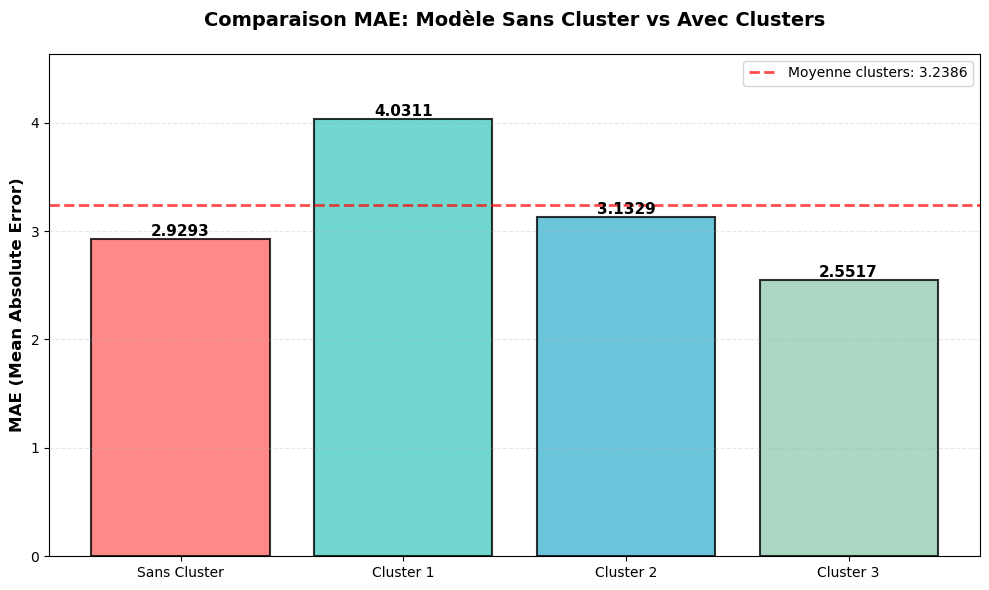

In [155]:
# Données MAE
mae_sans_cluster = mae_scores_5.mean()
mae_cluster1 = mae_5.mean()  # À récupérer depuis la boucle cluster_id=1
mae_cluster2 = mae_5.mean()  # À récupérer depuis la boucle cluster_id=2
mae_cluster3 = mae_5.mean()  # À récupérer depuis la boucle cluster_id=3

# Récupérer les MAE de chaque cluster (à ajouter dans la boucle)
mae_clusters = []
for cluster_id in [1, 2, 3]:
    df_cluster = df_sample[df_sample['cluster_final'] == cluster_id]
    X_cluster = df_cluster[['trip_duration', 'distance_traveled', 'num_of_passengers']]
    y_cluster = df_cluster['fare']
    mae_5_cluster = -cross_val_score(model, X_cluster, y_cluster, cv=5, scoring='neg_mean_absolute_error')
    mae_clusters.append(mae_5_cluster.mean())

# Créer le barplot
labels = ['Sans Cluster', 'Cluster 1', 'Cluster 2', 'Cluster 3']
mae_values = [mae_sans_cluster] + mae_clusters

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, mae_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'], 
               edgecolor='black', linewidth=1.5, alpha=0.8)

# Ajouter les valeurs sur les barres
for i, (bar, val) in enumerate(zip(bars, mae_values)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.4f}',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.ylabel('MAE (Mean Absolute Error)', fontsize=12, fontweight='bold')
plt.title('Comparaison MAE: Modèle Sans Cluster vs Avec Clusters', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max(mae_values) * 1.15)

# Ajouter une ligne de référence pour la moyenne des clusters
avg_clusters = np.mean(mae_clusters)
plt.axhline(y=avg_clusters, color='red', linestyle='--', linewidth=2, 
            label=f'Moyenne clusters: {avg_clusters:.4f}', alpha=0.7)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

### 5.2 Stratified Cross-Validation pour Classification

In [156]:
from sklearn.model_selection import StratifiedKFold

### modéle 1

In [157]:

x=df_sample[['trip_duration','distance_traveled', 'fare']]
y=df_sample['surge_applied']

In [158]:
folds = [StratifiedKFold(n_splits=5), StratifiedKFold(n_splits=10)]
logmodel = LogisticRegression(max_iter=1000)



for f in folds:

    accuracy_scores = []
    f1_scores = []
    recall_scores = []
    precision_scores = []
    for k, (train_index, test_index) in enumerate(f.split(x, y)):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        logmodel.fit(x_train, y_train)
        predictions = logmodel.predict(x_test)

        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        precision = precision_score(y_test, predictions)

        print(f'Fold: {k+1}\n'
              f'accuracy : {accuracy}\n'
              f"F1-score: {f1:.4f}\n"
              f"Recall: {recall:.4f}\n"
              f"Precision: {precision:.4f}\n")

        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        recall_scores.append(recall)
        precision_scores.append(precision)
    
    print(f"Mean accuracy Model 1 K={f.n_splits} :", sum(accuracy_scores)/len(accuracy_scores))
    print(f"Mean F1-score Model 1 K={f.n_splits} :", sum(f1_scores)/len(f1_scores))
    print(f"Mean Recall Model 1 K={f.n_splits} :", sum(recall_scores)/len(recall_scores))
    print(f"Mean Precision Model 1 K={f.n_splits} :", sum(precision_scores)/len(precision_scores))


Fold: 1
accuracy : 0.7426666666666667
F1-score: 0.2744
Recall: 0.1869
Precision: 0.5159

Fold: 2
accuracy : 0.7451666666666666
F1-score: 0.2750
Recall: 0.1857
Precision: 0.5302

Fold: 3
accuracy : 0.7346666666666667
F1-score: 0.2616
Recall: 0.1805
Precision: 0.4747

Fold: 4
accuracy : 0.7421666666666666
F1-score: 0.2686
Recall: 0.1818
Precision: 0.5136

Fold: 5
accuracy : 0.7423333333333333
F1-score: 0.2769
Recall: 0.1894
Precision: 0.5148

Mean accuracy Model 1 K=5 : 0.7414
Mean F1-score Model 1 K=5 : 0.27129914096976576
Mean Recall Model 1 K=5 : 0.1848669168503723
Mean Precision Model 1 K=5 : 0.5098316128629495
Fold: 1
accuracy : 0.7423333333333333
F1-score: 0.2659
Recall: 0.1793
Precision: 0.5147

Fold: 2
accuracy : 0.743
F1-score: 0.2841
Recall: 0.1959
Precision: 0.5169

Fold: 3
accuracy : 0.745
F1-score: 0.2721
Recall: 0.1831
Precision: 0.5296

Fold: 4
accuracy : 0.7456666666666667
F1-score: 0.2822
Recall: 0.1921
Precision: 0.5319

Fold: 5
accuracy : 0.7313333333333333
F1-score: 0

 mean accuracy =0.7442 . k=5 suffisait,
 
 k=10 n'apporte aucune amélioration 
 
 → choisir k=5 pour gagner du temps.

In [159]:
Kfold=StratifiedKFold(n_splits=5)
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []
for k, (train_index, test_index) in enumerate(Kfold.split(x, y)):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        logmodel.fit(x_train, y_train)
        predictions = logmodel.predict(x_test)

        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        precision = precision_score(y_test, predictions)

        
        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        recall_scores.append(recall)
        precision_scores.append(precision)
mean_accuracy= sum(accuracy_scores)/len(accuracy_scores)
mean_f1_score= sum(f1_scores)/len(f1_scores)
mean_recall= sum(recall_scores)/len(recall_scores)
mean_precision= sum(precision_scores)/len(precision_scores)

### modéle 2

In [160]:

x1=df_sample[['trip_duration','distance_traveled', "cluster_final", 'fare']]
y1=df_sample['surge_applied']

In [161]:
folds = [StratifiedKFold(n_splits=5), StratifiedKFold(n_splits=10)]
logmodel = LogisticRegression(max_iter=1000)


for f in folds:
    accuracy_scores1 = []
    f1_scores1 = []
    recall_scores1 = []
    precision_scores1 = []
    for k, (train_index, test_index) in enumerate(f.split(x1, y1)):
        x_train, x_test = x1.iloc[train_index], x1.iloc[test_index]
        y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]

        logmodel.fit(x_train, y_train)
        predictions = logmodel.predict(x_test)

        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        precision = precision_score(y_test, predictions)

        print(f'Fold: {k+1}\n'
              f'accuracy : {accuracy}\n'
              f"F1-score: {f1:.4f}\n"
              f"Recall: {recall:.4f}\n"
              f"Precision: {precision:.4f}\n")

        accuracy_scores1.append(accuracy)
        f1_scores1.append(f1)
        recall_scores1.append(recall)
        precision_scores1.append(precision)
    
    print(f"Mean accuracy Model 2 K={f.n_splits} :", sum(accuracy_scores1)/len(accuracy_scores1))
    print(f"Mean F1-score Model 2 K={f.n_splits} :", sum(f1_scores1)/len(f1_scores1))
    print(f"Mean Recall Model 2 K={f.n_splits} :", sum(recall_scores1)/len(recall_scores1))
    print(f"Mean Precision Model 2 K={f.n_splits} :", sum(precision_scores1)/len(precision_scores1))


Fold: 1
accuracy : 0.7431666666666666
F1-score: 0.2637
Recall: 0.1767
Precision: 0.5198

Fold: 2
accuracy : 0.7465
F1-score: 0.2649
Recall: 0.1754
Precision: 0.5404

Fold: 3
accuracy : 0.7341666666666666
F1-score: 0.2473
Recall: 0.1677
Precision: 0.4704

Fold: 4
accuracy : 0.7413333333333333
F1-score: 0.2602
Recall: 0.1748
Precision: 0.5093

Fold: 5
accuracy : 0.7428333333333333
F1-score: 0.2670
Recall: 0.1798
Precision: 0.5185

Mean accuracy Model 2 K=5 : 0.7416
Mean F1-score Model 2 K=5 : 0.2606232399858365
Mean Recall Model 2 K=5 : 0.17488094974780924
Mean Precision Model 2 K=5 : 0.5116726997616396
Fold: 1
accuracy : 0.7423333333333333
F1-score: 0.2517
Recall: 0.1665
Precision: 0.5159

Fold: 2
accuracy : 0.744
F1-score: 0.2768
Recall: 0.1882
Precision: 0.5231

Fold: 3
accuracy : 0.7473333333333333
F1-score: 0.2726
Recall: 0.1818
Precision: 0.5441

Fold: 4
accuracy : 0.7453333333333333
F1-score: 0.2654
Recall: 0.1767
Precision: 0.5328

Fold: 5
accuracy : 0.7313333333333333
F1-score: 

 Excellent modèle mean accuracy =0.7442 . k=5 suffisait,
 
 k=10 n'apporte aucune amélioration 
 
 → choisir k=5 pour gagner du temps.

In [162]:
Kfold=StratifiedKFold(n_splits=5)
accuracy_scores_1 = []
f1_scores_1 = []
recall_scores_1 = []
precision_scores_1 = []
for k, (train_index, test_index) in enumerate(Kfold.split(x1, y1)):
        x_train, x_test = x1.iloc[train_index], x1.iloc[test_index]
        y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]

        logmodel.fit(x_train, y_train)
        predictions = logmodel.predict(x_test)

        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        precision = precision_score(y_test, predictions)

        accuracy_scores_1.append(accuracy)
        f1_scores_1.append(f1)
        recall_scores_1.append(recall)
        precision_scores_1.append(precision)
mean_accuracy_1= sum(accuracy_scores_1)/len(accuracy_scores_1)
mean_f1_score_1= sum(f1_scores_1)/len(f1_scores_1)
mean_recall_1= sum(recall_scores_1)/len(recall_scores_1)
mean_precision_1= sum(precision_scores_1)/len(precision_scores_1)

### Comparaison

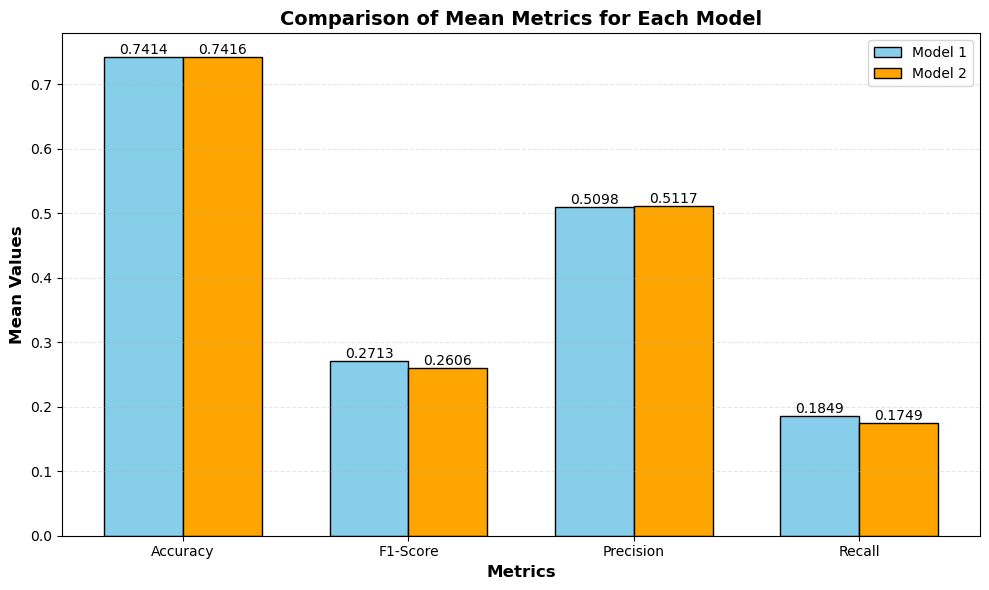

In [163]:
# Define the means for each model
metrics = ['Accuracy', 'F1-Score', 'Precision', 'Recall']
model_1_means = [mean_accuracy, mean_f1_score, mean_precision, mean_recall]
model_2_means = [mean_accuracy_1, mean_f1_score_1, mean_precision_1, mean_recall_1]

# Create the bar chart
x = range(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x, model_1_means, width, label='Model 1', color='skyblue', edgecolor='black')
bars2 = plt.bar([i + width for i in x], model_2_means, width, label='Model 2', color='orange', edgecolor='black')

# Add labels and title
plt.xlabel('Metrics', fontsize=12, fontweight='bold')
plt.ylabel('Mean Values', fontsize=12, fontweight='bold')
plt.title('Comparison of Mean Metrics for Each Model', fontsize=14, fontweight='bold')
plt.xticks([i + width / 2 for i in x], metrics, fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add values on top of each bar
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()